# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | port douglas
Processing Record 4 of Set 1 | puerto baquerizo moreno
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | swansea
Processing Record 8 of Set 1 | san ramon
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | salekhard
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | kiunga
Processing Record 14 of Set 1 | happy valley-goose bay
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | gaiman
Processing Record 18 of Set 1 | fort bragg
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | blackmans bay
Proc

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,27.86,90,100,2.37,GS,1697142914
1,port douglas,-16.4833,145.4667,71.01,75,100,6.24,AU,1697142915
2,puerto baquerizo moreno,-0.9000,-89.6000,81.59,69,40,11.50,EC,1697142748
3,port alfred,-33.5906,26.8910,58.17,89,18,1.99,ZA,1697142917
4,iqaluit,63.7506,-68.5145,31.73,80,40,2.30,CA,1697142917


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

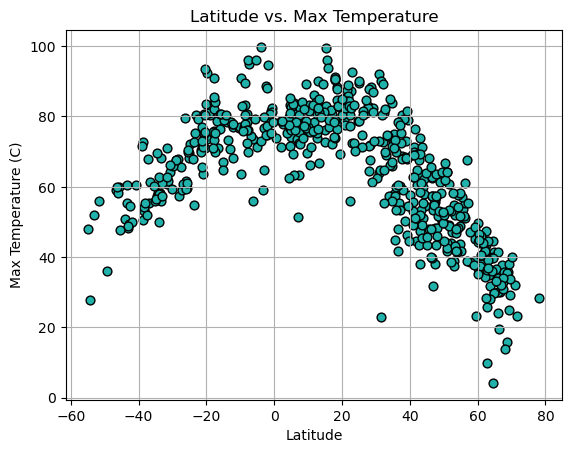

In [36]:
# Build scatter plot for latitude vs. temperature
max_temp=city_data_df["Max Temp"]
latitude=city_data_df["Lat"]

x_values=latitude
y_values=max_temp
plt.scatter(x_values, y_values, s=40, c="lightseagreen", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Latitude vs. Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

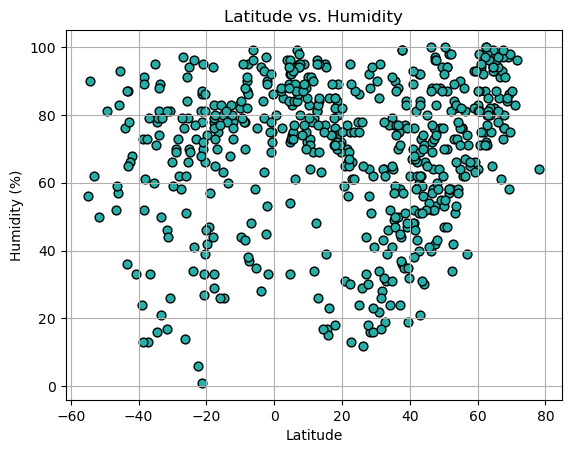

In [19]:
# Build the scatter plots for latitude vs. humidity
humidity=city_data_df["Humidity"]
latitude=city_data_df["Lat"]

x_values=latitude
y_values=humidity
plt.scatter(x_values, y_values, s=40, c="lightseagreen", edgecolor="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

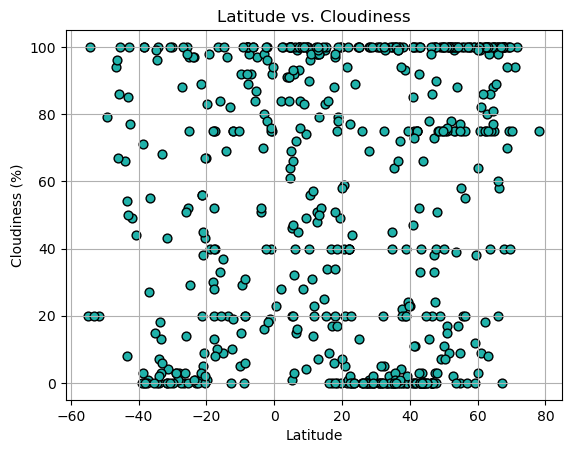

In [20]:
# Build the scatter plots for latitude vs. cloudiness
clouds=city_data_df["Cloudiness"]
latitude=city_data_df["Lat"]

x_values=latitude
y_values=clouds
plt.scatter(x_values, y_values, s=40, c="lightseagreen", edgecolor="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

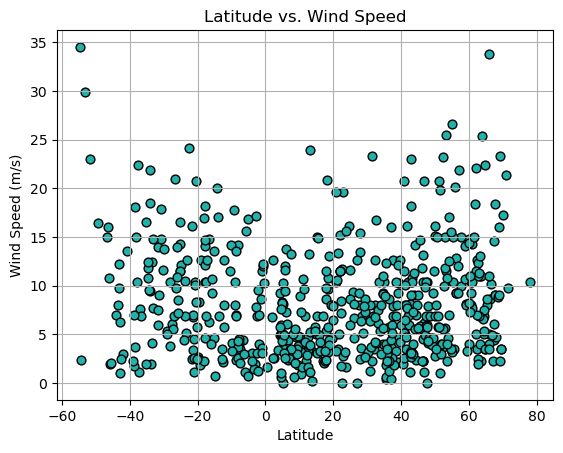

In [21]:
# Build the scatter plots for latitude vs. wind speed
wind=city_data_df["Wind Speed"]
latitude=city_data_df["Lat"]

x_values=latitude
y_values=wind
plt.scatter(x_values, y_values, s=40, c="lightseagreen", edgecolor="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
linregress_values = x_values * slope + intercept
lin_equation="y=" + str(round(slope, 1)) + "x +" + str(round(intercept,1))
plt.plot(x_values, linregress_values)

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,iqaluit,63.7506,-68.5145,31.73,80,40,2.30,CA,1697142917
5,swansea,51.6208,-3.9432,60.67,98,100,1.01,GB,1697142918
6,san ramon,37.7799,-121.9780,80.29,36,0,6.91,US,1697142854
8,stanley,54.8680,-1.6985,43.79,90,0,3.44,GB,1697142919
9,salekhard,66.5300,66.6019,30.20,91,100,10.13,RU,1697142919


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,27.86,90,100,2.37,GS,1697142914
1,port douglas,-16.4833,145.4667,71.01,75,100,6.24,AU,1697142915
2,puerto baquerizo moreno,-0.9000,-89.6000,81.59,69,40,11.50,EC,1697142748
3,port alfred,-33.5906,26.8910,58.17,89,18,1.99,ZA,1697142917
7,adamstown,-25.0660,-130.1015,69.51,70,97,11.52,PN,1697142918


###  Temperature vs. Latitude Linear Regression Plot

Pearson Correlation Coefficient:  -0.838311701340712 and a P-value of: 2.1706566033776217e-111


Text(0.5, 1.0, 'Latitude vs. Max Temperature')

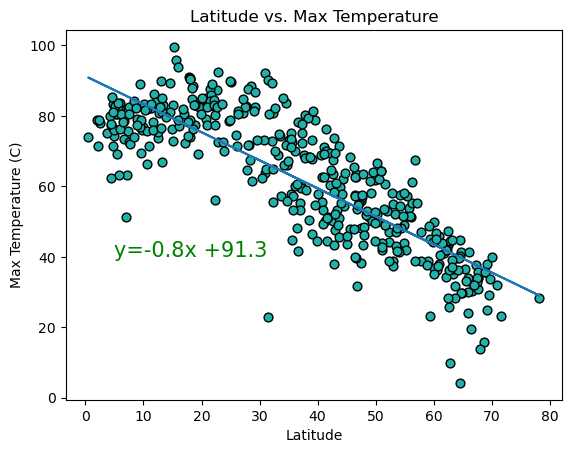

In [38]:
import scipy.stats as st

# Linear regression on Northern Hemisphere
max_temp=northern_hemi_df["Max Temp"]
latitude=northern_hemi_df["Lat"]

x_values=latitude
y_values=max_temp
plt.scatter(x_values, y_values, s=40, c="lightseagreen", edgecolor="black")

#Correlation Coefficent
pearson_coef, p_value = st.pearsonr(max_temp, latitude)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress_values = x_values * slope + intercept
lin_equation="y=" + str(round(slope, 1)) + "x +" + str(round(intercept,1))
plt.plot(x_values, linregress_values)
plt.annotate(lin_equation,fontsize=15,color="green", xy=[5,40])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Latitude vs. Max Temperature")

Pearson Correlation Coefficient:  0.76384495788605 and a P-value of: 2.1776269982527863e-33


Text(0.5, 1.0, 'Latitude vs. Max Temperature')

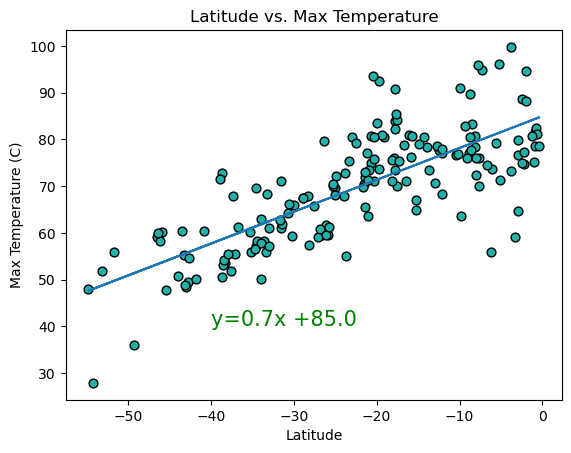

In [40]:
# Linear regression on Southern Hemisphere
max_temp=southern_hemi_df["Max Temp"]
latitude=southern_hemi_df["Lat"]

x_values=latitude
y_values=max_temp
plt.scatter(x_values, y_values, s=40, c="lightseagreen", edgecolor="black")

#Correlation Coefficent
pearson_coef, p_value = st.pearsonr(max_temp, latitude)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress_values = x_values * slope + intercept
lin_equation="y=" + str(round(slope, 1)) + "x +" + str(round(intercept,1))
plt.plot(x_values, linregress_values)
plt.annotate(lin_equation,fontsize=15,color="green", xy=[-40,40])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Latitude vs. Max Temperature")

**Discussion about the linear relationship:**
In the Northern Hemisphere there is a strong negative linear relationship and strong negative correlation. 
In the Southern Hemishpere there is a strong positive linear relationship and strong positive correlation. 

### Humidity vs. Latitude Linear Regression Plot

Pearson Correlation Coefficient:  0.07468728550505 and a P-value of: 0.12783208256644177


Text(0.5, 1.0, 'Latitude vs. Humidity')

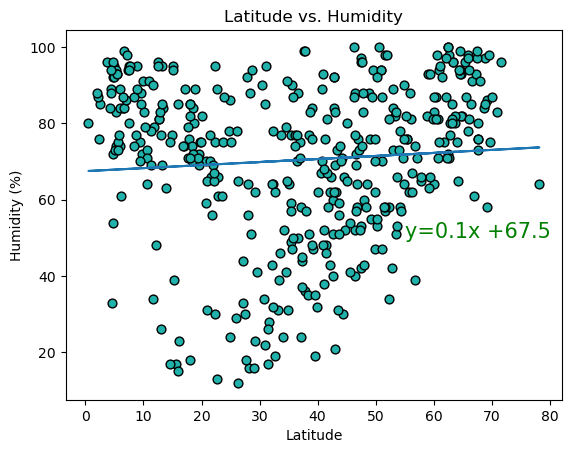

In [47]:
# Northern Hemisphere
humidity=northern_hemi_df["Humidity"]
latitude=northern_hemi_df["Lat"]

x_values=latitude
y_values=humidity
plt.scatter(x_values, y_values, s=40, c="lightseagreen", edgecolor="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")

#Correlation Coefficent
pearson_coef, p_value = st.pearsonr(humidity, latitude)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress_values = x_values * slope + intercept
lin_equation="y=" + str(round(slope, 1)) + "x +" + str(round(intercept,1))
plt.plot(x_values, linregress_values)
plt.annotate(lin_equation,fontsize=15,color="green", xy=[55,50])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")

Pearson Correlation Coefficient:  0.1466397893481053 and a P-value of: 0.05786163958026334


Text(0.5, 1.0, 'Latitude vs. Humidity')

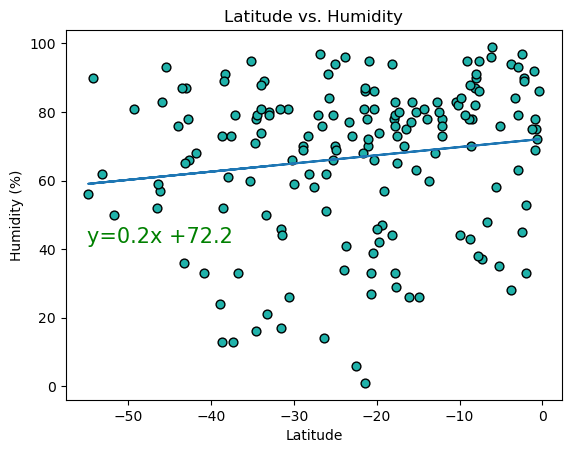

In [48]:
# Southern Hemisphere
humidity=southern_hemi_df["Humidity"]
latitude=southern_hemi_df["Lat"]

x_values=latitude
y_values=humidity
plt.scatter(x_values, y_values, s=40, c="lightseagreen", edgecolor="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")

#Correlation Coefficent
pearson_coef, p_value = st.pearsonr(humidity, latitude)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress_values = x_values * slope + intercept
lin_equation="y=" + str(round(slope, 1)) + "x +" + str(round(intercept,1))
plt.plot(x_values, linregress_values)
plt.annotate(lin_equation,fontsize=15,color="green", xy=[-55,42])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")

**Discussion about the linear relationship:**
The relationship between latitude and humidity is not very significant it either the northern Himsphere or Southern Hemisphere for the cities. The correlation coefficent is stronger for the SOuthern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

Pearson Correlation Coefficient:  0.11508888029241364 and a P-value of: 0.01872587799872398


Text(0.5, 1.0, 'Latitude vs. Cloudiness')

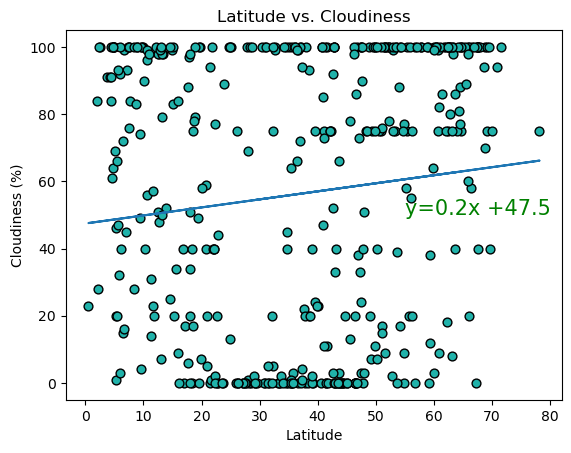

In [50]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
clouds=northern_hemi_df["Cloudiness"]
latitude=northern_hemi_df["Lat"]

x_values=latitude
y_values=clouds
plt.scatter(x_values, y_values, s=40, c="lightseagreen", edgecolor="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")

#Correlation Coefficent
pearson_coef, p_value = st.pearsonr(clouds, latitude)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress_values = x_values * slope + intercept
lin_equation="y=" + str(round(slope, 1)) + "x +" + str(round(intercept,1))
plt.plot(x_values, linregress_values)
plt.annotate(lin_equation,fontsize=15,color="green", xy=[55,50])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")

Pearson Correlation Coefficient:  0.1834983969492344 and a P-value of: 0.01727009406270287


Text(0.5, 1.0, 'Latitude vs. Cloudiness')

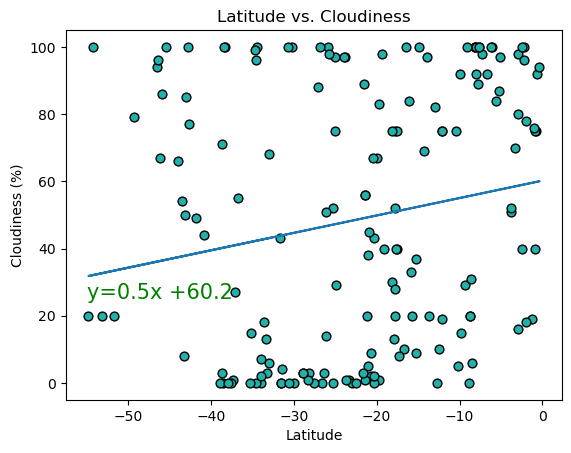

In [53]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
clouds=southern_hemi_df["Cloudiness"]
latitude=southern_hemi_df["Lat"]

x_values=latitude
y_values=clouds
plt.scatter(x_values, y_values, s=40, c="lightseagreen", edgecolor="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")

#Correlation Coefficent
pearson_coef, p_value = st.pearsonr(clouds, latitude)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress_values = x_values * slope + intercept
lin_equation="y=" + str(round(slope, 1)) + "x +" + str(round(intercept,1))
plt.plot(x_values, linregress_values)
plt.annotate(lin_equation,fontsize=15,color="green", xy=[-55,25])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")

**Discussion about the linear relationship:**
There is not a strong linear relationship between latitude and cloudiness in either hemisphere. Correlation is slightly better in the Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

Pearson Correlation Coefficient:  0.2676212170320943 and a P-value of: 2.854540554492544e-08


Text(10, 30, 'y=0.1x +5.0')

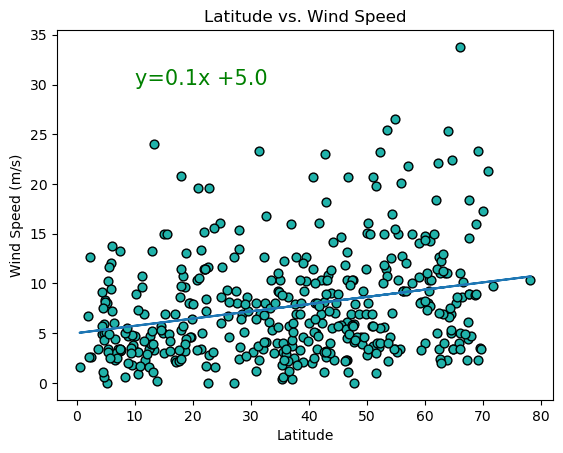

In [55]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. wind speed
wind=northern_hemi_df["Wind Speed"]
latitude=northern_hemi_df["Lat"]

x_values=latitude
y_values=wind
plt.scatter(x_values, y_values, s=40, c="lightseagreen", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed")

#Correlation Coefficent
pearson_coef, p_value = st.pearsonr(wind, latitude)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress_values = x_values * slope + intercept
lin_equation="y=" + str(round(slope, 1)) + "x +" + str(round(intercept,1))
plt.plot(x_values, linregress_values)
plt.annotate(lin_equation,fontsize=15,color="green", xy=[10,30])

Pearson Correlation Coefficient:  -0.25903732691877224 and a P-value of: 0.0006976524301171886


Text(-45, 26, 'y=-0.1x +6.4')

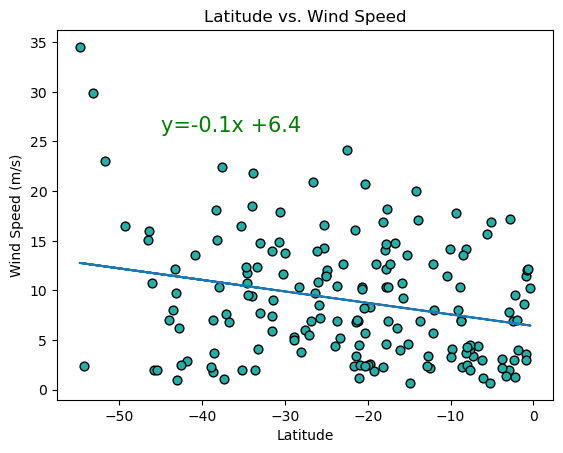

In [57]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. wind speed
wind=southern_hemi_df["Wind Speed"]
latitude=southern_hemi_df["Lat"]

x_values=latitude
y_values=wind
plt.scatter(x_values, y_values, s=40, c="lightseagreen", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed")

#Correlation Coefficent
pearson_coef, p_value = st.pearsonr(wind, latitude)
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

#Linear Regression Model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress_values = x_values * slope + intercept
lin_equation="y=" + str(round(slope, 1)) + "x +" + str(round(intercept,1))
plt.plot(x_values, linregress_values)
plt.annotate(lin_equation,fontsize=15,color="green", xy=[-45,26])

**Discussion about the linear relationship:**
In the Northern Hemisphere it would appear that there is a slight positive linear relationship between latitude and wind speed with a correlation coefficent of 0.26.
In the Southern Hemisphere there is a slight negative linear relationship between latitude and wind speed with a negative correlation coefiffcient of -0.25.